# **Milestone 1**

In [ ]:
# ========================================
# 1. Data Preparation & Initial Analysis
# ========================================
# 1. Install dependencies
!pip install pandas numpy

import pandas as pd
import numpy as np

In [ ]:
# 2. Upload dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("GlobalWeatherRepository.csv", engine='python', on_bad_lines='skip')

Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv


In [ ]:
# 3. Inspect dataset
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {df.shape}\n")

print("=== First 20 Columns ===")
print(df.columns.tolist()[:20], "\n")

print("=== Data Types (first 15) ===")
print(df.dtypes.head(15), "\n")

print("=== Sample Rows ===")
display(df.head(5))


=== Dataset Overview ===
Shape (rows, columns): (89248, 41)

=== First 20 Columns ===
['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud'] 

=== Data Types (first 15) ===
country                    object
location_name              object
latitude                  float64
longitude                 float64
timezone                   object
last_updated_epoch          int64
last_updated               object
temperature_celsius       float64
temperature_fahrenheit    float64
condition_text             object
wind_mph                  float64
wind_kph                  float64
wind_degree                 int64
wind_direction             object
pressure_mb               float64
dtype: object 

=== Sample Rows ===


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
# 4. Check missing values
print("\nMissing values (%):\n", (df.isna().mean() * 100).sort_values(ascending=False).head(10))


Missing values (%):
 country                   0.0
location_name             0.0
latitude                  0.0
longitude                 0.0
timezone                  0.0
last_updated_epoch        0.0
last_updated              0.0
temperature_celsius       0.0
temperature_fahrenheit    0.0
condition_text            0.0
dtype: float64


In [ ]:

# 5. Basic cleaning
## Rename columns to lowercase_with_underscores
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace(r"[^a-z0-9_]", "", regex=True)
)

## Parse datetime
if "last_updated" in df.columns:
    df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")
    df["year"] = df["last_updated"].dt.year
    df["month"] = df["last_updated"].dt.month

## Remove duplicates
df = df.drop_duplicates()

## Handle missing humidity & precipitation
if "humidity" in df.columns:
    df["humidity"] = df["humidity"].clip(0, 100)

if "precip_mm" in df.columns:
    df["precip_mm"] = df["precip_mm"].clip(lower=0)

# Wind speed: derive meters/second from km/h
if "wind_kph" in df.columns:
    df["wind_speed_ms"] = df["wind_kph"] / 3.6

# Pressure: rename mb -> hPa
if "pressure_mb" in df.columns:
    df = df.rename(columns={"pressure_mb":"pressure_hpa"})
print("Shape after cleaning:", df.shape)
print("Missing values (%):\n", (df.isna().mean() * 100).head(10))
print("\nSample cleaned data:\n", df.head(5))

Shape after cleaning: (89248, 44)
Missing values (%):
 country                   0.0
location_name             0.0
latitude                  0.0
longitude                 0.0
timezone                  0.0
last_updated_epoch        0.0
last_updated              0.0
temperature_celsius       0.0
temperature_fahrenheit    0.0
condition_text            0.0
dtype: float64

Sample cleaned data:
        country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch        last_updated  temperature_celsius  \
0          1715849100 2024-05-16 13:15:00                 26.6   
1          1715849100 2024-05-16 10:

In [ ]:

# 6. Save cleaned dataset
df.to_csv("cleaned_weather.csv", index=False)
print("\n Cleaned dataset saved as cleaned_weather.csv")


 Cleaned dataset saved as cleaned_weather.csv


In [ ]:
# 7. Aggregate monthly averages
if "location_name" in df.columns and "last_updated" in df.columns:
    monthly = (
        df.groupby(["country","location_name","year","month"], as_index=False)
          .agg({
              "temperature_celsius":"mean",
              "humidity":"mean",
              "wind_speed_ms":"mean",
              "precip_mm":"sum",
              "pressure_hpa":"mean"
          })
    )
    monthly.to_csv("monthly_weather.csv", index=False)
    print(" Monthly aggregated dataset saved as monthly_weather.csv")

 Monthly aggregated dataset saved as monthly_weather.csv


In [ ]:
# ============================================
# Step 1: Load cleaned dataset
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned file
df = pd.read_csv("/content/cleaned_weather.csv")

# Parse datetime again if needed
df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")

print("Shape:", df.shape)
df.head(3)


Shape: (89248, 44)


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_gbdefraindex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,year,month,wind_speed_ms
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,2024,5,3.694444
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly cloudy,...,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55,2024,5,3.111111
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,2024,5,4.194444


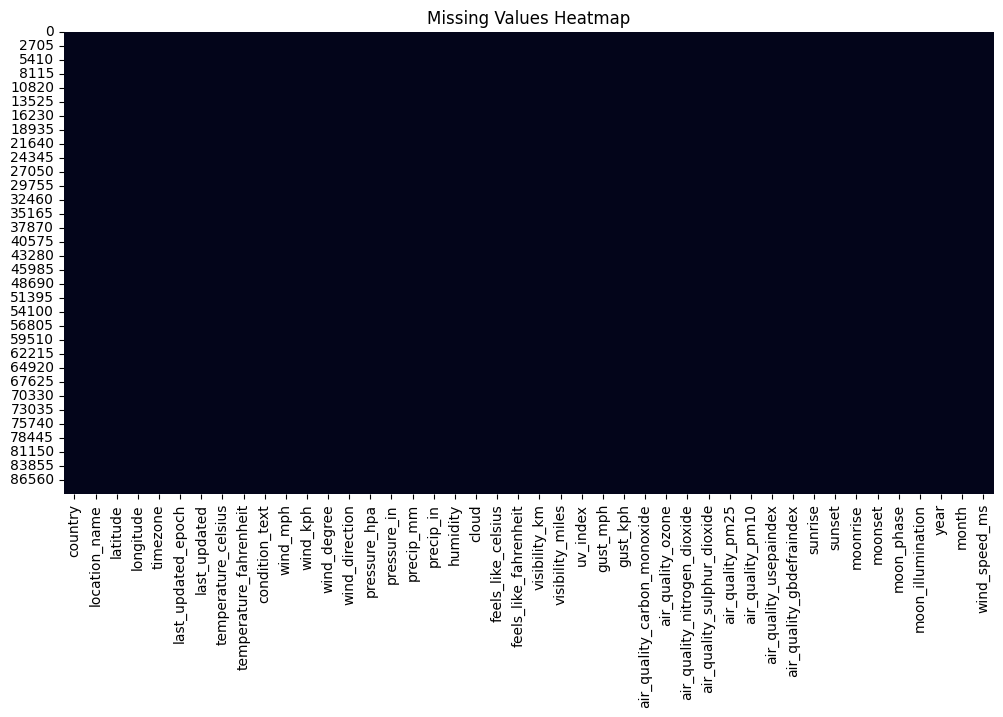

In [ ]:
# ============================================
# Step 2: Missing values heatmap
# ============================================
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


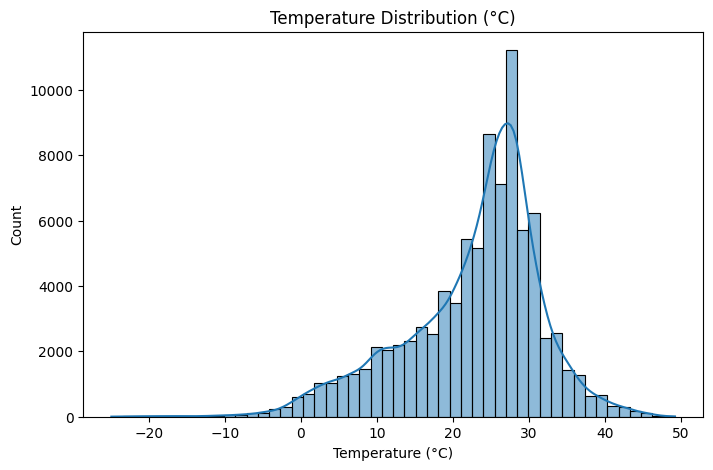

In [ ]:
# ============================================
# Step 3: Distribution of Temperature
# ============================================
plt.figure(figsize=(8,5))
sns.histplot(df["temperature_celsius"], bins=50, kde=True)
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


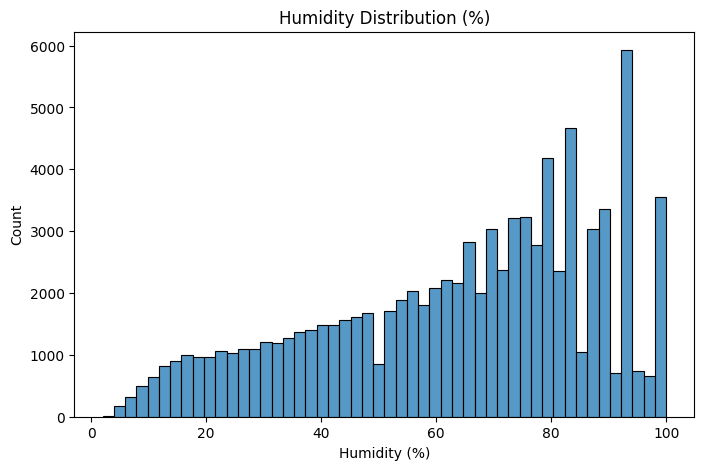

In [ ]:
# ============================================
# Step 4: Distribution of Humidity
# ============================================
plt.figure(figsize=(8,5))
sns.histplot(df["humidity"], bins=50, kde=False)
plt.title("Humidity Distribution (%)")
plt.xlabel("Humidity (%)")
plt.ylabel("Count")
plt.show()


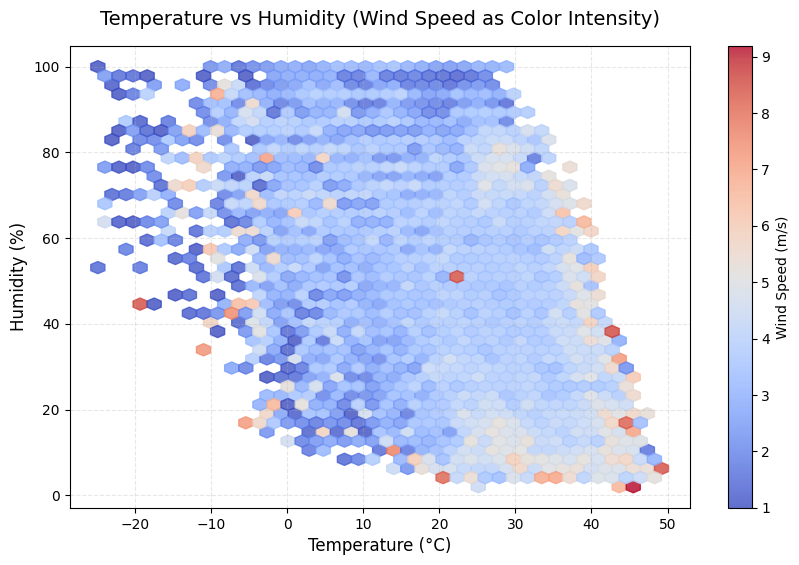

In [ ]:
# ============================================
# Step 5: Hexbin Temperature vs Humidity
# ============================================
plt.figure(figsize=(10,6))

hb = plt.hexbin(
    df["temperature_celsius"],
    df["humidity"],
    C=df["wind_speed_ms"],
    gridsize=40,
    cmap="coolwarm",
    reduce_C_function=np.mean,
    alpha=0.8
)

plt.colorbar(hb, label="Wind Speed (m/s)")
plt.title("Temperature vs Humidity (Wind Speed as Color Intensity)", fontsize=14, pad=15)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(alpha=0.3, linestyle="--")
plt.show()



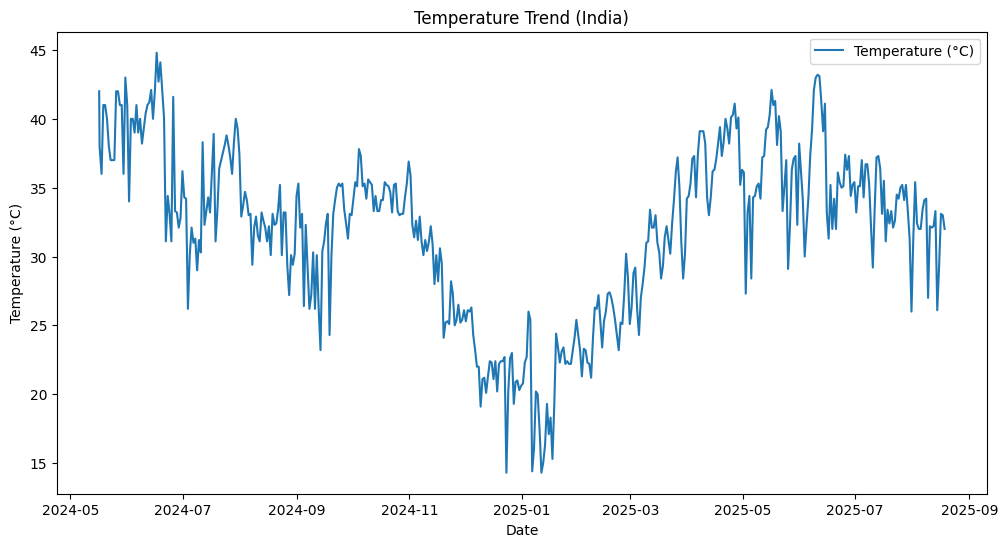

In [ ]:
# ============================================
# Step 6: Time-Series Line Plot (Temperature over Time)
# ============================================
# Pick one country for clarity
country_df = df[df["country"]=="India"].sort_values("last_updated").head(500)

plt.figure(figsize=(12,6))
plt.plot(country_df["last_updated"], country_df["temperature_celsius"], label="Temperature (°C)")
plt.title("Temperature Trend (India)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


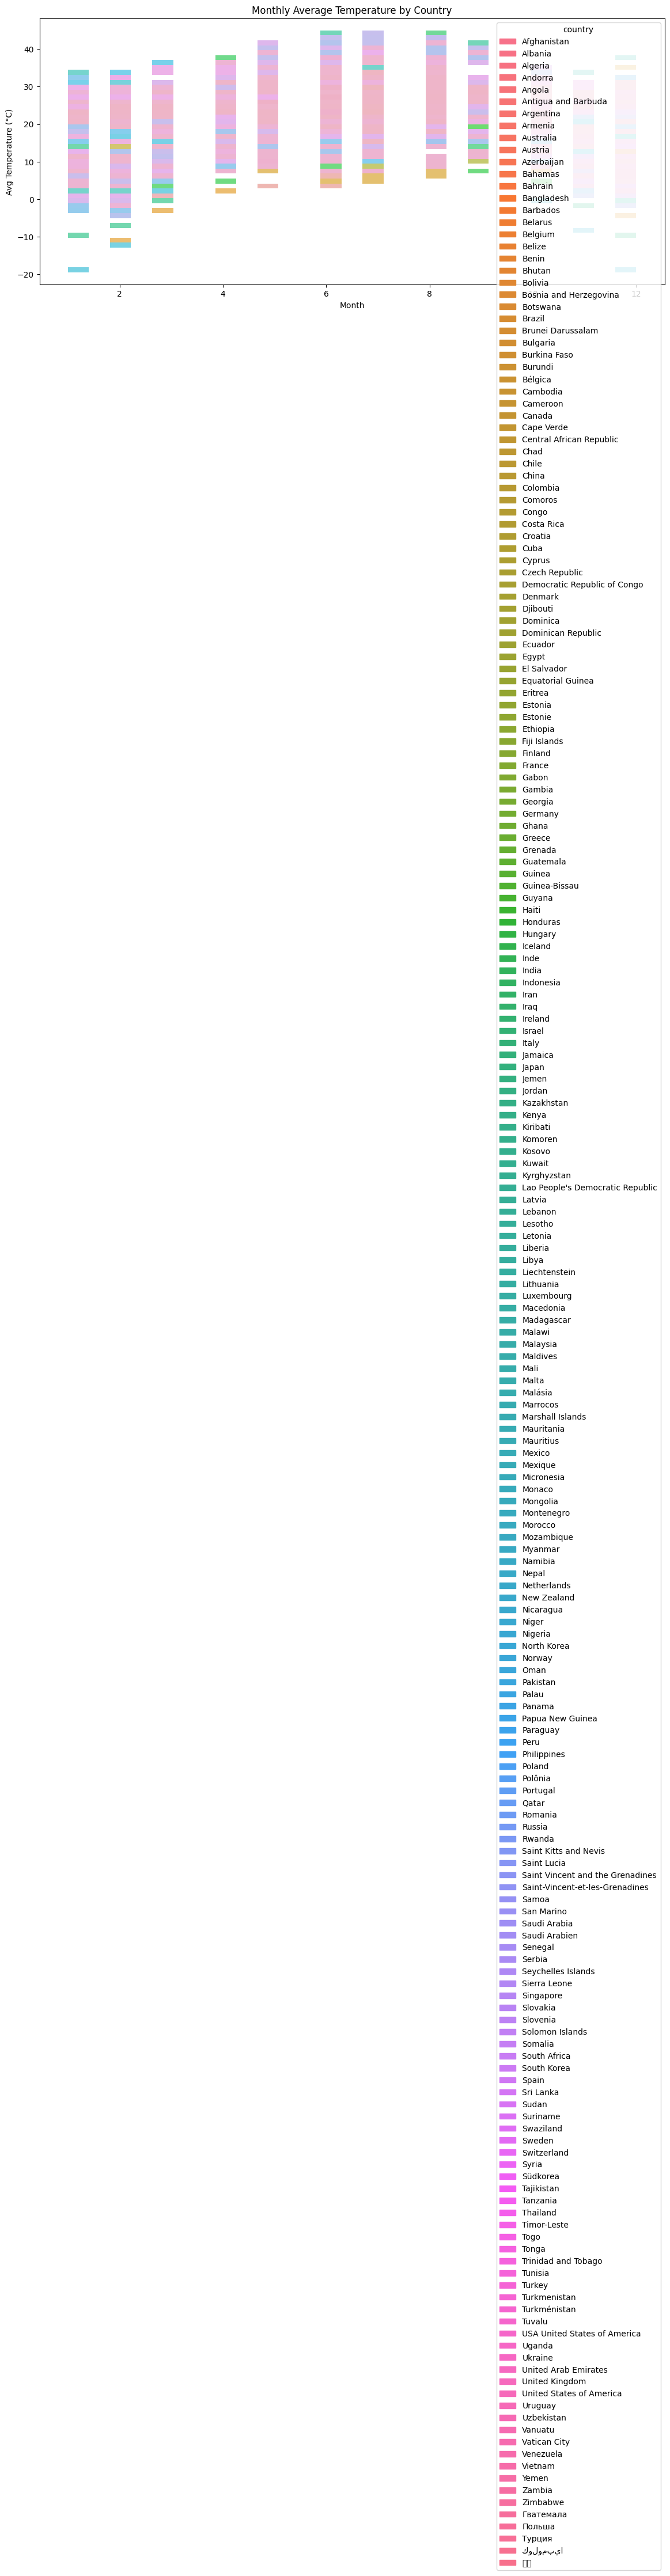

In [ ]:
# ============================================
# Step 7: Monthly Average Temperature by Country
# ============================================
monthly = pd.read_csv("/content/monthly_weather.csv")

plt.figure(figsize=(14,6))
sns.histplot(data=monthly, x="month", y="temperature_celsius", hue="country")
plt.title("Monthly Average Temperature by Country")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.show()


# **Milestone 1 completed**



# **Milestone 2 – Core Analysis & Visualization Design**
### **Objective:** Perform statistical analysis, detect trends, identify extreme events, compare regions, explore correlations, and design visualizations for dashboard wireframes.

In [ ]:
# ============================================
# Milestone 2: Core Analysis & Visualization Design
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset from Milestone 1
df = pd.read_csv("/content/cleaned_weather.csv")
monthly = pd.read_csv("/content/monthly_weather.csv")

In [ ]:
# --------------------------------------------
# 1. Summary Statistics
# --------------------------------------------
print("Summary Statistics:")
print(df[["temperature_celsius","humidity","wind_speed_ms","precip_mm","pressure_hpa"]].describe())

Summary Statistics:
       temperature_celsius      humidity  wind_speed_ms     precip_mm  \
count         89248.000000  89248.000000   89248.000000  89248.000000   
mean             22.707034     63.766740       3.705623      0.140824   
std               9.070481     24.256489       3.623646      0.600561   
min             -24.900000      2.000000       1.000000      0.000000   
25%              18.000000     46.000000       1.805556      0.000000   
50%              25.000000     69.000000       3.111111      0.000000   
75%              28.400000     83.000000       5.111111      0.030000   
max              49.200000    100.000000     823.111111     42.240000   

       pressure_hpa  
count  89248.000000  
mean    1013.967002  
std       11.741547  
min      947.000000  
25%     1010.000000  
50%     1013.000000  
75%     1018.000000  
max     3006.000000  


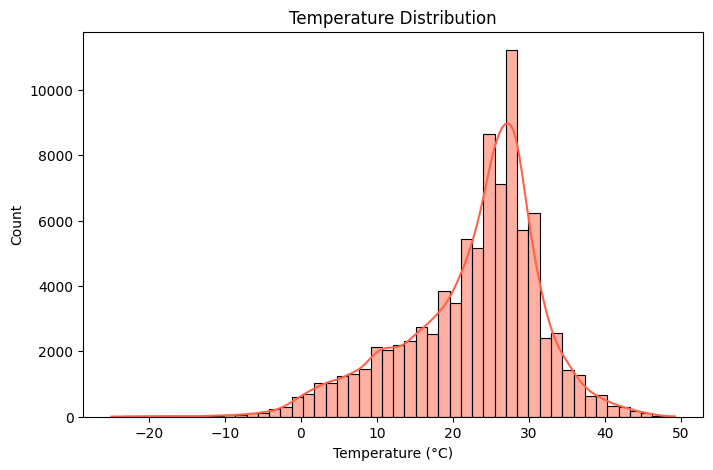

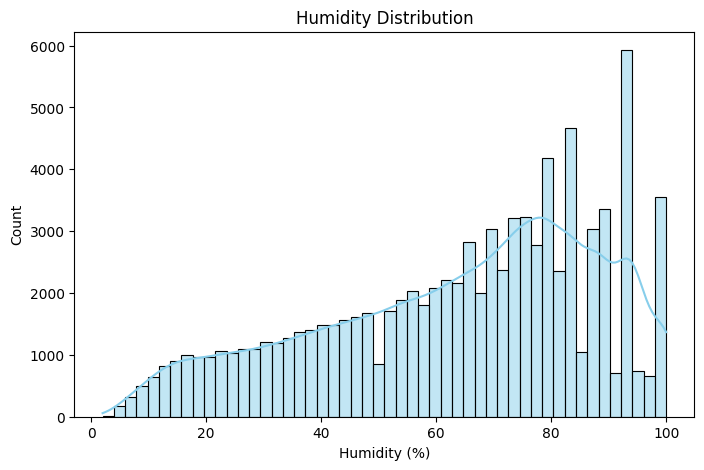

In [ ]:
# --------------------------------------------
# 2. Distributions
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["temperature_celsius"], bins=50, kde=True, color="tomato")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["humidity"], bins=50, kde=True, color="skyblue")
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.show()

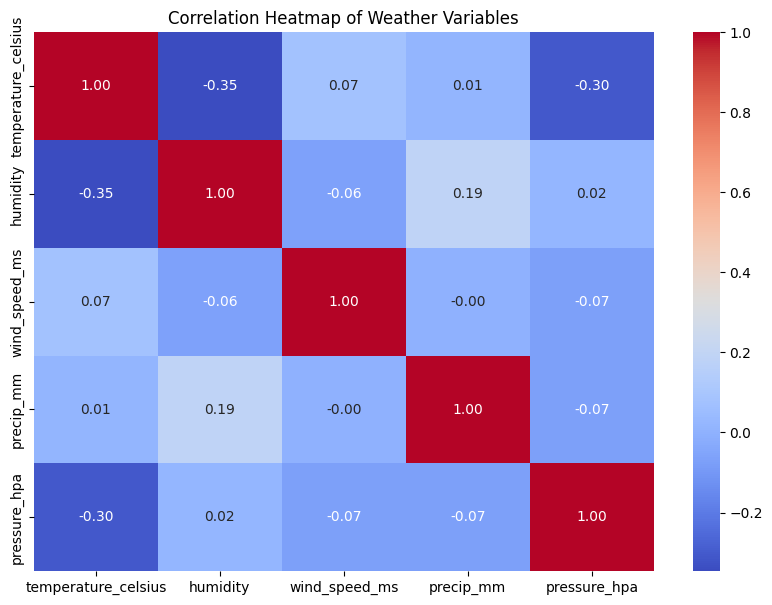

In [ ]:
# --------------------------------------------
# 3. Correlation Heatmap
# --------------------------------------------
features = ["temperature_celsius","humidity","wind_speed_ms","precip_mm","pressure_hpa"]
plt.figure(figsize=(10,7))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.show()

/tmp/ipython-input-2589120779.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly, x="month", y="temperature_celsius", hue="year", ci=None, palette="coolwarm")


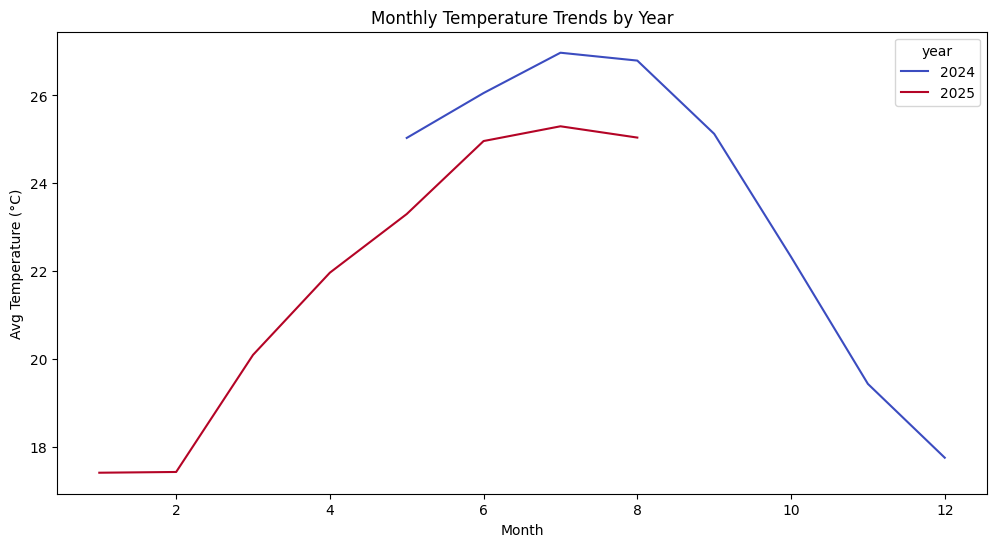

In [ ]:
# --------------------------------------------
# 4. Seasonal Trends (Monthly)
# --------------------------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x="month", y="temperature_celsius", hue="year", ci=None, palette="coolwarm")
plt.title("Monthly Temperature Trends by Year")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.show()

In [ ]:
# --------------------------------------------
# 5. Extreme Weather Events
# --------------------------------------------
extreme_heat = df[df["temperature_celsius"] > 40]
extreme_cold = df[df["temperature_celsius"] < 0]
extreme_rain = df[df["precip_mm"] > 100]

print("\nExtreme Heat Events (>40°C):", extreme_heat.shape[0])
print("Extreme Cold Events (<0°C):", extreme_cold.shape[0])
print("Extreme Rain Events (>100mm):", extreme_rain.shape[0])



Extreme Heat Events (>40°C): 1152
Extreme Cold Events (<0°C): 1370
Extreme Rain Events (>100mm): 0


/tmp/ipython-input-1531001001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_temp.values, y=top_countries_temp.index, palette="mako")


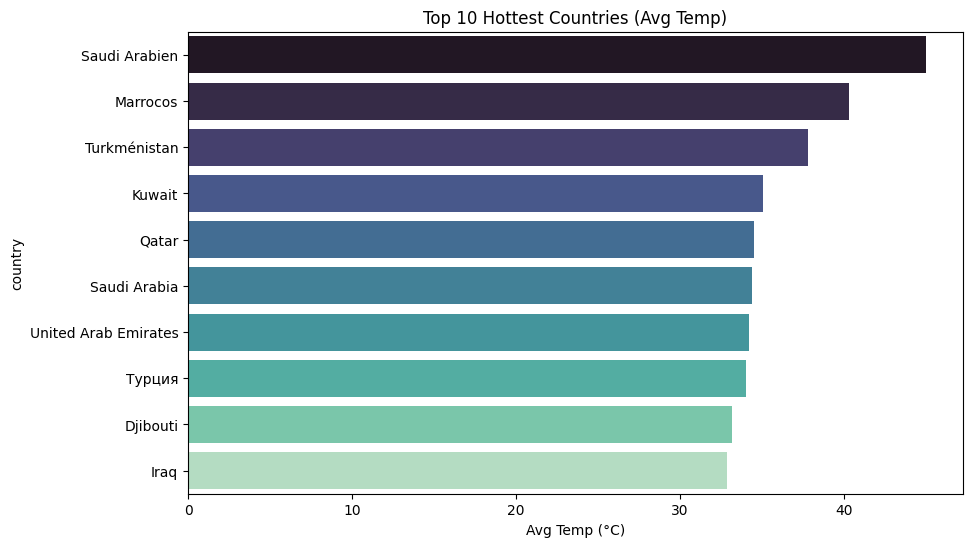

/tmp/ipython-input-1531001001.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_rain.values, y=top_countries_rain.index, palette="Blues_r")


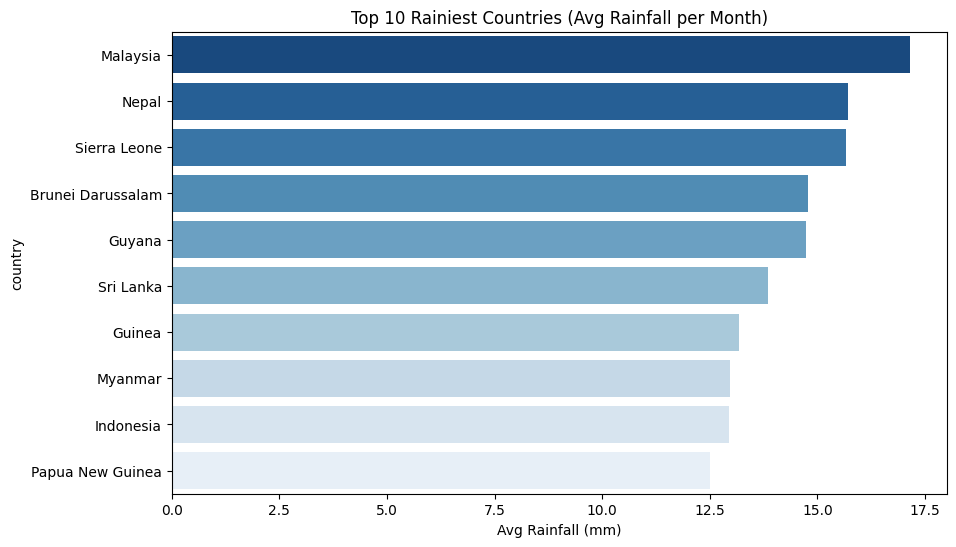

In [ ]:
# --------------------------------------------
# 6. Regional Comparisons
# --------------------------------------------
top_countries_temp = monthly.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_temp.values, y=top_countries_temp.index, palette="mako")
plt.title("Top 10 Hottest Countries (Avg Temp)")
plt.xlabel("Avg Temp (°C)")
plt.show()

top_countries_rain = monthly.groupby("country")["precip_mm"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries_rain.values, y=top_countries_rain.index, palette="Blues_r")
plt.title("Top 10 Rainiest Countries (Avg Rainfall per Month)")
plt.xlabel("Avg Rainfall (mm)")
plt.show()